*NOTE: In the TL,DR, optimize for **clarity** and **comprehensiveness**. The goal is to convey the post with the least amount of friction, especially since ipython/beakers require much more scrolling than blog posts. Make the reader get a correct understanding of the post's takeaway, and the points supporting that takeaway without having to strain through paragraphs and tons of prose. Bullet points are great here, but are up to you. Try to avoid academic paper style abstracts.*

 - Having a specific title will help avoid having someone browse posts and only finding vague, similar sounding titles
 - Having an itemized, short, and clear tl,dr will help readers understand your content
 - Setting the reader's context with a motivation section makes someone understand how to judge your choices
 - Visualizations that can stand alone, via legends, labels, and captions are more understandable and powerful


### Code 

In [8]:
# url1 = input("Enter the path  of gene_data csv file")

# url2 = input("Enter the path  of meta_data csv file")

url1 = 'Assignment-DS_gene_data.csv'
url2 = 'Assignment-DS_Meta_data_sheet_.csv'

# Error handling code

import os.path
from os import path

#check whether the file path exists or not


# print('does Gene-data file exist ? :', os.path.exists(url1))
# print('does Meta-data file exist ? :', os.path.exists(url2))

# if !(os.path.exists(url1) and os.path.exists(url1)) == True:
    

# Loading the Data

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


# load dataset into Pandas DataFrame

# symbol = pd.read_csv(url1,names = ['symbol'])
gene_data = pd.read_csv(url1, names=['symbol']+['S{0}'.format(i) for i in range(1,31)],header=None, skiprows=1)
meta_data = pd.read_csv(url2)  
# print(gene_data.head())

# print sample output
# print(gene_data['symbol'].head())
# print(meta_data.head())

# Data Processing

#all sldx features in a list
features = ['S{0}'.format(i) for i in range(1,31)]

#loading only sldx columns of each gene
gene_data_only = gene_data.loc[:, features]
# print(gene_data_only)


#sldx values such as 'ssssss', 'hhhh' can be removed or replaced with 0
preprocessed_gene_data = gene_data_only.replace({'ssssss': '0', 'hhhh' : '0'}, regex=True)

# print(len(preprocessed_gene_data))

# preprocessed_gene_data.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

# print(len(preprocessed_gene_data))
# preprocessed_gene_data[~preprocessed_gene_data.isin([np.nan, np.inf, -np.inf]).any(1)]
# preprocessed_gene_data[preprocessed_gene_data==np.inf]=np.nan
# preprocessed_gene_data.fillna(preprocessed_gene_data.mean(), inplace=True)

#loading the final processed data without any abnormalities
X = preprocessed_gene_data.loc[:, features].values
X = X.astype(np.float)

#change the infinite float value to median of the column
X[np.isnan(X)] = np.median(X[~np.isnan(X)])
# print(X)

# PCA Analysis

# Normalizing the data along vertical dir
X_T = X.T
X_normalized = StandardScaler().fit_transform(X_T)

# print(X_normalized.shape)


from sklearn.decomposition import PCA
#initialize PCA from sklearn, and apply fit_transform to get the data with lower dimensions by appling eigen value decomposition i.e PCA 

pca = PCA(n_components=2)
X_transform = pca.fit_transform(X_normalized.T)  

# print(X_transform)
# print(pca.explained_variance_ratio_)  
# print(pca.singular_values_)  

X_PCA = pca.components_
# print(X_PCA.shape)


label = np.array(meta_data['Time'])
# print(label)

# print(X_PCA[0,:])

# Interactive PCA plot of PC1 vs PC2



FileNotFoundError: File b'Assignment-DS_gene_data.csv' does not exist

### This Section Says Exactly This Takeaway

# PCA1 vs PCA2

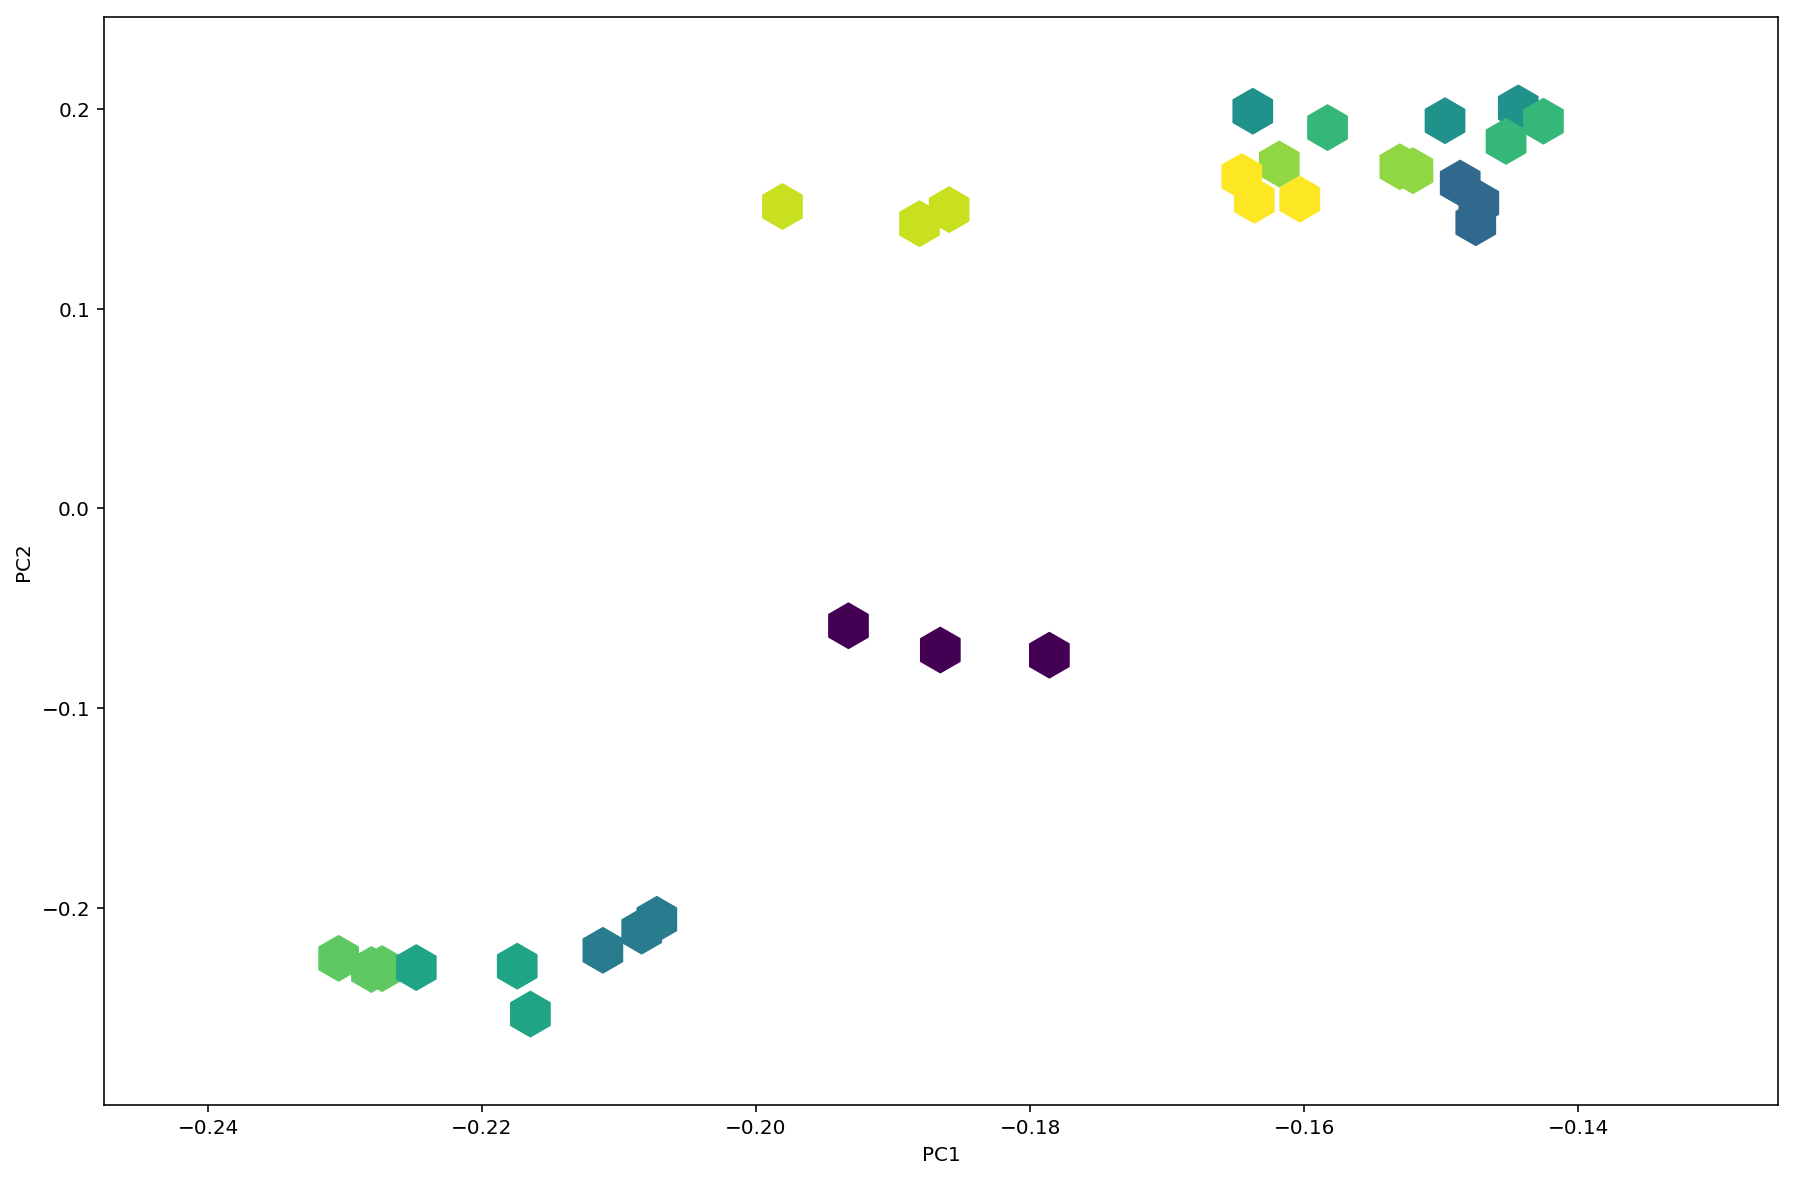

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize= (15,10))

%config InlineBackend.figure_format ='retina'

plt.scatter(X_PCA[0,:], X_PCA[1, :],s=500,c=label,marker='h')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



# PCA1 vs label

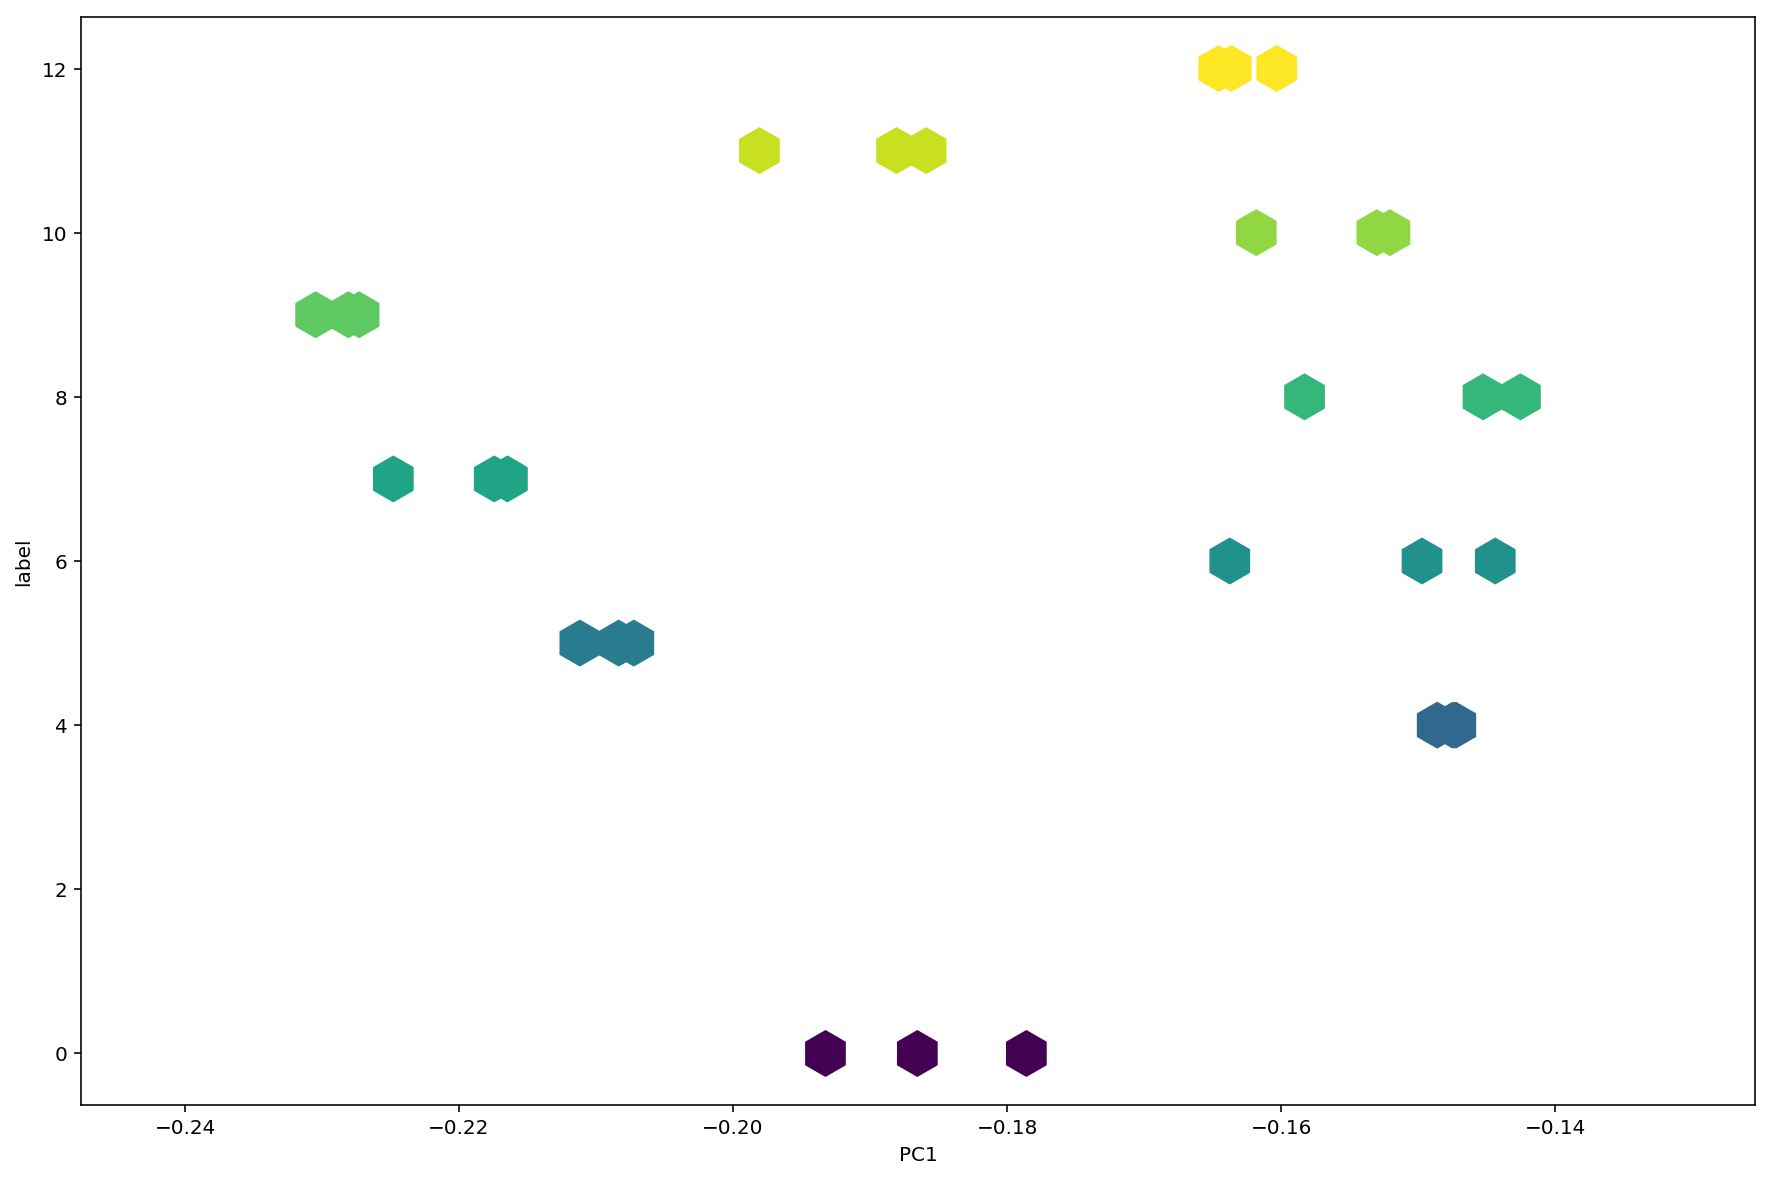

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize= (15,10))

%config InlineBackend.figure_format ='retina'

plt.scatter(X_PCA[0,:], label,s=500,c=label,marker='h')
plt.xlabel('PC1')
plt.ylabel('label')
plt.show()



# PCA2 vs label

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize= (15,10))

%config InlineBackend.figure_format ='retina'

plt.scatter(X_PCA[1,:], label,s=500,c=label,marker='h')
plt.xlabel('PC2')
plt.ylabel('label')
plt.show()